In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [117]:
#Reading training data
trainfile = r'/gdrive/My Drive/Assignments/Assignment1/Train.csv'
trainData = pd.read_csv(trainfile)

#Reading test data
testfile = r'/gdrive/My Drive/Assignments/Assignment1/Test.csv'
testData = pd.read_csv(testfile)

trainData.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [123]:
#EXPLORATORY DATA ANALYSIS
#checking data bias
trainData.groupby('TARGET').count()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
TARGET,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,...,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012
1,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,...,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


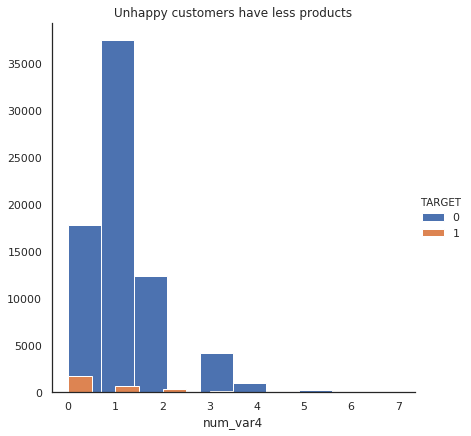

In [124]:
# Looking at the number of happy/unhappy customers as a  function of the number of bank products
sns.FacetGrid(trainData, hue="TARGET", size=6) \
   .map(plt.hist, "num_var4") \
   .add_legend()
plt.title('Unhappy customers have less products')
plt.show()

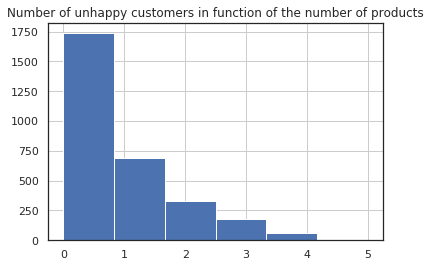

In [122]:
trainData[trainData.TARGET==1].num_var4.hist(bins=6)
plt.title('Number of unhappy customers in function of the number of products');

In [0]:
#Copy Train data excluding target
X_train = trainData.iloc[:, :-1].copy()

#Copy target data
Y_train = trainData.iloc[:, -1].copy()


In [108]:
#Splitting Train data into two parts in 80:20 ratio for evaluation purposes-
X_train_train, X_train_test, Y_train_train, Y_train_test= train_test_split(X_train, Y_train, test_size=0.20, random_state=42)


#Create Decision Tree Classifier
clf=DecisionTreeClassifier()

#Classifier application on X_train_train, Y_train_train
clf.fit(X_train_train,Y_train_train)

#Get Class Prediction as a data frame with header as Prediction
pred=pd.DataFrame(clf.predict(X_train_test),columns=["Prediction"])

pred.head()




,Prediction
0,0
1,0
2,0
3,0
4,0


In [109]:
#Getting Prediction Probability for the predicted class as a dataframe
pred_Probability =pd.DataFrame(clf.predict_proba(X_train_test))

pred_Probability.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [110]:
#Writing into a file with actual prediction and corresponding probability
pd.concat([pred,pred_Probability],axis=1).to_csv("/gdrive/My Drive/Assignments/Assignment1/results.csv", index = None)

res=pd.read_csv('/gdrive/My Drive/Assignments/Assignment1/results.csv')
res.head()

,Prediction,0,1
0,0,1.0,0.0
1,0,1.0,0.0
2,0,1.0,0.0
3,0,1.0,0.0
4,0,1.0,0.0


In [111]:
#Print Classification Report
print(classification_report(Y_train_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14597
           1       0.13      0.14      0.14       607

    accuracy                           0.93     15204
   macro avg       0.55      0.55      0.55     15204
weighted avg       0.93      0.93      0.93     15204



In [112]:
#testdata_copy_test prediction
#Get Class Prediction as a data frame with header as Prediction
pred=pd.DataFrame(clf.predict(testData),columns=["Prediction"])

pred.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


In [113]:
#Get Class Prediction probabilities as a data frame 
#Get Prediction Probability for the predicted class as a dataframe
pred_Probability =pd.DataFrame(clf.predict_proba(testData))

pred_Probability.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [114]:
#Write into a file with actual prediction and corresponding probability
pd.concat([testData['ID'],pred],axis=1).to_csv("/gdrive/My Drive/Assignments/Assignment1/Test_results.csv", index = None)

res=pd.read_csv('/gdrive/My Drive/Assignments/Assignment1/Test_results.csv')
res.head()

,ID,Prediction
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
